In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [126]:
df = pd.read_csv('global_laptop_selling_data.csv')

In [127]:
df.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

In [128]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [129]:
df = df.drop('laptop_ID', axis=1)

In [130]:
df.head() # y = df[['Price_euros']]

Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  
0  Intel Iris Plus Graphics 640  macOS  1.37kg      1339.69  
1        Intel HD Graphics 6000  macOS  1.34kg       898.94  
2         Intel HD Graphics 620  No OS  1.86kg       575.00  
3            AMD Radeon Pro 455  macOS  1.83kg      2537.45  
4  Intel Iris Plus Graphics 650  macOS  1.37kg      1803.60

# Preprocessing

In [131]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [132]:
df.head()

Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  
0  Intel Iris Plus Graphics 640  macOS    1.37      1339.69  
1        Intel HD Graphics 6000  macOS    1.34       898.94  
2         Intel HD Graphics 620  No OS    1.86       575.00  
3            AMD Radeon Pro 455  macOS    1.83      2537.45  
4  Intel Iris Plus Graphics 650  macOS    1.37      1803.60

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.2+ KB


In [134]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [135]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [136]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)


Text(0.5, 1.0, 'Average Price Per Company')

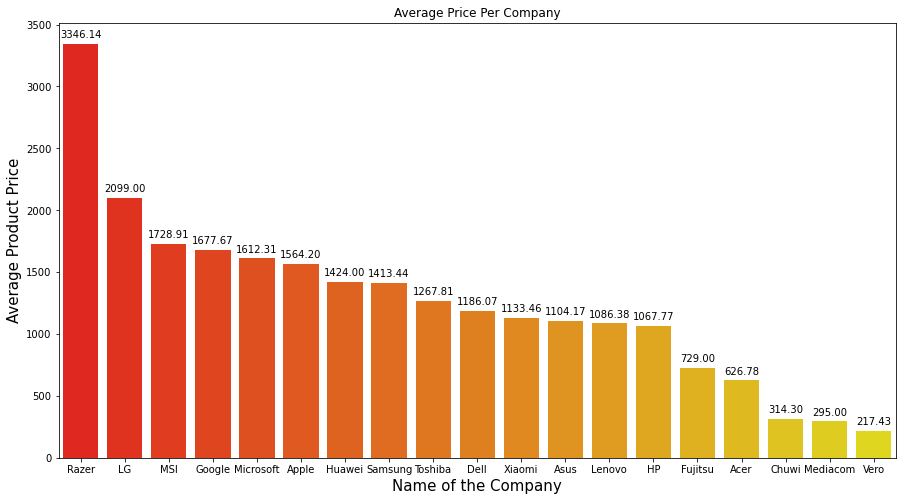

In [137]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

# Keep Continue for Regression Model

In [138]:
df[['Screen','Screen_Resoluton_Height']] = df['ScreenResolution'].str.split('x',expand=True)
df["Screen_Resoluton_Height"] = pd.to_numeric(df["Screen_Resoluton_Height"])

In [139]:
df.head()

Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  \
0  Intel Iris Plus Graphics 640  macOS    1.37      1339.69   
1        Intel HD Graphics 6000  macOS    1.34       898.94   
2         Intel HD Graphics 620  No OS    1.86       575.00   
3            AMD Radeon Pro 455  macOS    1.83      2537.45   
4  Intel Iris Plus Graphics 650  macOS    1.37      1803.60   

                          Screen  Screen_Resoluton_Height  
0  IPS Panel Retina Display 2560                     1600  
1                           1440                      900  
2                   Full HD 1920                     1080  
3  IPS Panel Retina Display 2880                     1800  
4  IPS Panel Retina Display 2560                     1600

In [140]:
df[["Screen_Display",'sep',"Screen_Resoluton_Weight"]] = df["Screen"].str.split("(\d\d)", n=1, expand=True)
df["Screen_Resoluton_Weight"] = df["sep"] + df["Screen_Resoluton_Weight"]
df["Screen_Resoluton_Weight"] = pd.to_numeric(df["Screen_Resoluton_Weight"])
df.drop('sep',axis=1,inplace=True)

In [141]:
df.drop('ScreenResolution',axis=1,inplace=True)
df.drop('Screen',axis=1,inplace=True)
df.drop('Screen_Display',axis=1,inplace=True)

In [142]:
df.head()

Company      Product   TypeName  Inches                         Cpu  Ram  \
0   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5 2.3GHz    8   
1   Apple  Macbook Air  Ultrabook    13.3        Intel Core i5 1.8GHz    8   
2      HP       250 G6   Notebook    15.6  Intel Core i5 7200U 2.5GHz    8   
3   Apple  MacBook Pro  Ultrabook    15.4        Intel Core i7 2.7GHz   16   
4   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5 3.1GHz    8   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS    1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS    1.34   
2            256GB SSD         Intel HD Graphics 620  No OS    1.86   
3            512GB SSD            AMD Radeon Pro 455  macOS    1.83   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS    1.37   

   Price_euros  Screen_Resoluton_Height  Screen_Resoluton_Weight  
0      1339.69                     1600                     2560  
1       898.94                      900                     1440  
2       575.00                     1080                     1920  
3      2537.45                     1800                     2880  
4      1803.60                     1600                     2560

In [143]:
df[['Cpu_Core','Cpu_Processor_Speed_GHz']] = df['Cpu'].str.rsplit(" ", n=1, expand=True)

In [144]:
df["Cpu_Processor_Speed_GHz"] = df["Cpu_Processor_Speed_GHz"].str.replace("GHz","")
df["Cpu_Processor_Speed_GHz"] = pd.to_numeric(df["Cpu_Processor_Speed_GHz"])
df.drop('Cpu',axis=1,inplace=True)
df.drop('Cpu_Core',axis=1,inplace=True)

In [145]:
df.head()

Company      Product   TypeName  Inches  Ram               Memory  \
0   Apple  MacBook Pro  Ultrabook    13.3    8            128GB SSD   
1   Apple  Macbook Air  Ultrabook    13.3    8  128GB Flash Storage   
2      HP       250 G6   Notebook    15.6    8            256GB SSD   
3   Apple  MacBook Pro  Ultrabook    15.4   16            512GB SSD   
4   Apple  MacBook Pro  Ultrabook    13.3    8            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  \
0  Intel Iris Plus Graphics 640  macOS    1.37      1339.69   
1        Intel HD Graphics 6000  macOS    1.34       898.94   
2         Intel HD Graphics 620  No OS    1.86       575.00   
3            AMD Radeon Pro 455  macOS    1.83      2537.45   
4  Intel Iris Plus Graphics 650  macOS    1.37      1803.60   

   Screen_Resoluton_Height  Screen_Resoluton_Weight  Cpu_Processor_Speed_GHz  
0                     1600                     2560                      2.3  
1                      900                     1440                      1.8  
2                     1080                     1920                      2.5  
3                     1800                     2880                      2.7  
4                     1600                     2560                      3.1

In [146]:
df[['Memory(storage_amount)','Memory(storage_device)']] = df['Memory'].str.split(" ", n=1, expand=True)

In [147]:
df["Memory(storage_amount)_GB"] = df["Memory(storage_amount)"].str.replace("GB||TB","")
df["Memory(storage_amount)_GB"] = pd.to_numeric(df["Memory(storage_amount)_GB"])

C:\Users\Dell\AppData\Local\Temp\ipykernel_6736\2457804247.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Memory(storage_amount)_GB"] = df["Memory(storage_amount)"].str.replace("GB||TB","")


In [149]:
df.drop('Memory(storage_amount)',axis=True,inplace=True)
df.drop('Memory(storage_device)',axis=True,inplace=True)
df.drop('Memory',axis=1,inplace=True)

In [150]:
df.head()

Company      Product   TypeName  Inches  Ram                           Gpu  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  Intel Iris Plus Graphics 640   
1   Apple  Macbook Air  Ultrabook    13.3    8        Intel HD Graphics 6000   
2      HP       250 G6   Notebook    15.6    8         Intel HD Graphics 620   
3   Apple  MacBook Pro  Ultrabook    15.4   16            AMD Radeon Pro 455   
4   Apple  MacBook Pro  Ultrabook    13.3    8  Intel Iris Plus Graphics 650   

   OpSys  Weight  Price_euros  Screen_Resoluton_Height  \
0  macOS    1.37      1339.69                     1600   
1  macOS    1.34       898.94                      900   
2  No OS    1.86       575.00                     1080   
3  macOS    1.83      2537.45                     1800   
4  macOS    1.37      1803.60                     1600   

   Screen_Resoluton_Weight  Cpu_Processor_Speed_GHz  Memory(storage_amount)_GB  
0                     2560                      2.3                      128.0  
1                     1440                      1.8                      128.0  
2                     1920                      2.5                      256.0  
3                     2880                      2.7                      512.0  
4                     2560                      3.1                      256.0

In [153]:
df[['Gpu_Graphics','sep','Gpu_Graphics_GB']] = df['Gpu'].str.split("(\d\d)", n=1, expand=True)
df["Gpu_Graphics_GB"] = df["sep"] + df["Gpu_Graphics_GB"]

In [154]:
df.drop('Gpu_Graphics',axis=1,inplace=True)
df.drop('Gpu',axis=1,inplace=True)
df.drop('sep',axis=1,inplace=True)

In [155]:
df.head()

Company      Product   TypeName  Inches  Ram  OpSys  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

   Screen_Resoluton_Height  Screen_Resoluton_Weight  Cpu_Processor_Speed_GHz  \
0                     1600                     2560                      2.3   
1                      900                     1440                      1.8   
2                     1080                     1920                      2.5   
3                     1800                     2880                      2.7   
4                     1600                     2560                      3.1   

   Memory(storage_amount)_GB Gpu_Graphics_GB  
0                      128.0             640  
1                      128.0            6000  
2                      256.0             620  
3                      512.0             455  
4                      256.0             650

# Encoding

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
le=LabelEncoder()

In [158]:
df['TypeName']=le.fit_transform(df['TypeName'])

In [159]:
df['Company']=le.fit_transform(df['Company'])

In [160]:
df['Product']=le.fit_transform(df['Product'])

In [161]:
df['OpSys']=le.fit_transform(df['OpSys'])

In [162]:
df['Gpu_Graphics_GB']=le.fit_transform(df['Gpu_Graphics_GB'])

In [163]:
df.head()

Company  Product  TypeName  Inches  Ram  OpSys  Weight  Price_euros  \
0        1      300         4    13.3    8      8    1.37      1339.69   
1        1      301         4    13.3    8      8    1.34       898.94   
2        7       50         3    15.6    8      4    1.86       575.00   
3        1      300         4    15.4   16      8    1.83      2537.45   
4        1      300         4    13.3    8      8    1.37      1803.60   

   Screen_Resoluton_Height  Screen_Resoluton_Weight  Cpu_Processor_Speed_GHz  \
0                     1600                     2560                      2.3   
1                      900                     1440                      1.8   
2                     1080                     1920                      2.5   
3                     1800                     2880                      2.7   
4                     1600                     2560                      3.1   

   Memory(storage_amount)_GB  Gpu_Graphics_GB  
0                      128.0               55  
1                      128.0               49  
2                      256.0               52  
3                      512.0               31  
4                      256.0               56


# Scaling

In [165]:
from sklearn.preprocessing import MaxAbsScaler

In [166]:
mscal=MaxAbsScaler()

In [167]:
df['Product']=mscal.fit_transform(df[['Product']])

In [169]:
df['Screen_Resoluton_Height']=mscal.fit_transform(df[['Screen_Resoluton_Height']])

In [170]:
df['Screen_Resoluton_Weight']=mscal.fit_transform(df[['Screen_Resoluton_Weight']])

In [171]:
df['Memory(storage_amount)_GB']=mscal.fit_transform(df[['Memory(storage_amount)_GB']])

In [172]:
df['Gpu_Graphics_GB']=mscal.fit_transform(df[['Gpu_Graphics_GB']])

In [173]:
df.head()

Company   Product  TypeName  Inches  Ram  OpSys  Weight  Price_euros  \
0        1  0.486224         4    13.3    8      8    1.37      1339.69   
1        1  0.487844         4    13.3    8      8    1.34       898.94   
2        7  0.081037         3    15.6    8      4    1.86       575.00   
3        1  0.486224         4    15.4   16      8    1.83      2537.45   
4        1  0.486224         4    13.3    8      8    1.37      1803.60   

   Screen_Resoluton_Height  Screen_Resoluton_Weight  Cpu_Processor_Speed_GHz  \
0                 0.740741                 0.666667                      2.3   
1                 0.416667                 0.375000                      1.8   
2                 0.500000                 0.500000                      2.5   
3                 0.833333                 0.750000                      2.7   
4                 0.740741                 0.666667                      3.1   

   Memory(storage_amount)_GB  Gpu_Graphics_GB  
0                       0.25         0.743243  
1                       0.25         0.662162  
2                       0.50         0.702703  
3                       1.00         0.418919  
4                       0.50         0.756757

In [182]:
df.Product.nunique()

618

In [183]:
df.Company.nunique()

19

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1303 non-null   int32  
 1   Product                    1303 non-null   float64
 2   TypeName                   1303 non-null   int32  
 3   Inches                     1303 non-null   float64
 4   Ram                        1303 non-null   int32  
 5   OpSys                      1303 non-null   int32  
 6   Weight                     1303 non-null   float64
 7   Price_euros                1303 non-null   float64
 8   Screen_Resoluton_Height    1303 non-null   float64
 9   Screen_Resoluton_Weight    1303 non-null   float64
 10  Cpu_Processor_Speed_GHz    1303 non-null   float64
 11  Memory(storage_amount)_GB  1303 non-null   float64
 12  Gpu_Graphics_GB            1303 non-null   float64
dtypes: float64(9), int32(4)
memory usage: 112.1 KB


# Data Separate train test split

In [185]:
x=df.drop('Price_euros',axis=1)
y=df[['Price_euros']]

In [186]:
from sklearn.model_selection import train_test_split as tts

In [187]:
xtrain,xtest,ytrain,ytest=tts(x,y,train_size=70,random_state=1)

# Linear-Regression

In [189]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()


In [190]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [226]:
lrg=lr.score(xtest,ytest)
lrg

0.49698398323226733

# KNN Regressor

In [195]:
from sklearn.neighbors import  KNeighborsRegressor

KNN= KNeighborsRegressor()

In [196]:
KNN.fit(xtrain,ytrain)

KNeighborsRegressor()

In [227]:
knnr=KNN.score(xtest,ytest)
knnr

0.4919669799494042

# SVM regressor

In [198]:
from sklearn.svm import SVR

In [202]:
svr = SVR(kernel='linear')

In [203]:
svr.fit(xtrain,ytrain)

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [228]:
sv=svr.score(xtest,ytest)
sv

0.4970051881790084

# Decision-Tree-Regressor

In [206]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [207]:
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [229]:
dtr = dt.score(xtest,ytest)
dtr

0.11072471986250687

# Ada-Boost-Regressor

In [209]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()

In [210]:
adr.fit(xtrain,ytrain)

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor()

In [230]:
ad = adr.score(xtest,ytest)
ad

0.6321511766370331

# XGBoost Regressor

In [214]:
import xgboost as xg

In [220]:
xgb = xg.XGBRegressor(objective='reg:linear',n_estimators = 10)

In [221]:
xgb.fit(xtrain,ytrain)

[20:33:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [231]:
xgr = xgb.score(xtest,ytest)
xgr

0.6890082847073761

# Gradient-Boosting-Regressor

In [223]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [224]:
gbr.fit(xtrain,ytrain)

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [232]:
gb= gbr.score(xtest,ytest)
gb

0.7366084045019509

In [233]:
data={
    'Algorithm_name': ['LinearRegression', 'KNNRegressor','SVM regressor','Decision Tree','ADAboost','XGBRegressor','GredientBoostingRegressor'],
    'Accuracy': [lrg,knnr,sv,dtr,ad,xgr,gb],
}
ds = pd.DataFrame(data)
ds

Algorithm_name  Accuracy
0           LinearRegression  0.496984
1               KNNRegressor  0.491967
2              SVM regressor  0.497005
3              Decision Tree  0.110725
4                   ADAboost  0.632151
5               XGBRegressor  0.689008
6  GredientBoostingRegressor  0.736608

In [234]:
ds.nlargest(1,'Accuracy')

Algorithm_name  Accuracy
6  GredientBoostingRegressor  0.736608

In [235]:
import seaborn as sns
sns.set(color_codes=True)
from seaborn import barplot

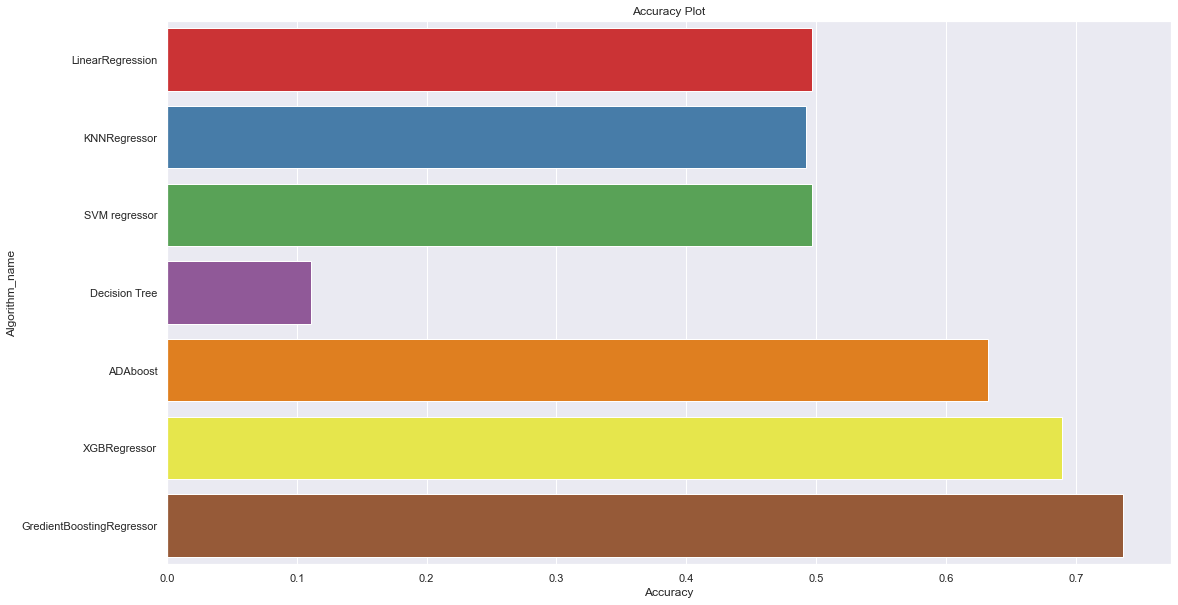

In [241]:
sns.set()
sns.barplot(y='Algorithm_name', x='Accuracy', data=ds, palette="Set1").set(title='Accuracy Plot')
sns.set(rc={'figure.figsize':(12,8)})